In [1]:
import os
import sys

module_path = os.path.abspath(os.path.join('../..'))

if module_path not in sys.path:
    sys.path.append(module_path)

In [8]:
import numpy as np

# Constrained Quadratic Methods

A general quadratic optimization problem subject to linear constraints, i.e., *equality* and *inequality* constraints, can be written as:

$$
\begin{equation}
    \begin{aligned}
        \min_x \quad & \frac{1}{2}x^T Q x + q^T x \\
            \textrm{subject to} \quad & Ax = b \\ & Gx \leq h
    \end{aligned}
\end{equation}
$$

For what about its usage in Machine Learning, i.e., for training *Support Vector Machines*, we are interested in a special case of this problem where the inequality constraints are box-constraints:

$$
\begin{equation}
    \begin{aligned}
        \min_x \quad & \frac{1}{2}x^T Q x + q^T x \\
            \textrm{subject to} \quad & Ax = 0 \\ & 0 \leq x \leq ub
    \end{aligned}
\end{equation}
$$

In [34]:
from optiml.opti import Quadratic
from optiml.opti.constrained import *
from optiml.opti.utils import generate_box_constrained_quadratic, plot_surface_trajectory_optimization

In [3]:
Q, q, ub = generate_box_constrained_quadratic(ndim=2, seed=6)
quad = Quadratic(Q, q)

### Lagrangian Dual

In [14]:
from optiml.opti.unconstrained.stochastic import AdaGrad

epoch	iter	 cost		 gap		 rate
   0	   0	-6.7315e+02	-6.7315e+02			pcost: -7.0838e+02	dgap:  4.9733e-02
 500	 500	-9.5164e+02	-9.5164e+02	-1.4137e+00	pcost: -3.3674e+03	dgap:  7.1740e-01
1000	1000	-1.8016e+02	-1.8016e+02	-1.8931e-01	pcost: -1.7426e+03	dgap:  8.9662e-01
1500	1500	-3.4071e+01	-3.4071e+01	-1.8912e-01	pcost: -8.1029e+02	dgap:  9.5795e-01
2000	2000	-6.4422e+00	-6.4422e+00	-1.8908e-01	pcost: -3.6224e+02	dgap:  9.8222e-01
2500	2500	-1.2180e+00	-1.2180e+00	-1.8907e-01	pcost: -1.5938e+02	dgap:  9.9236e-01
3000	3000	-2.3030e-01	-2.3030e-01	-1.8907e-01	pcost: -6.9656e+01	dgap:  9.9669e-01
3500	3500	-4.3543e-02	-4.3543e-02	-4.3543e-02	pcost: -3.0355e+01	dgap:  9.9857e-01
4000	4000	-8.2328e-03	-8.2328e-03	-8.2328e-03	pcost: -1.3212e+01	dgap:  9.9938e-01
4500	4500	-1.5566e-03	-1.5566e-03	-1.5566e-03	pcost: -5.7472e+00	dgap:  9.9973e-01
5000	5000	-2.9431e-04	-2.9430e-04	-2.9430e-04	pcost: -2.4995e+00	dgap:  9.9988e-01
5500	5500	-5.5645e-05	-5.5642e-05	-5.5642e-05	pcost: -1.0869e+00	dg

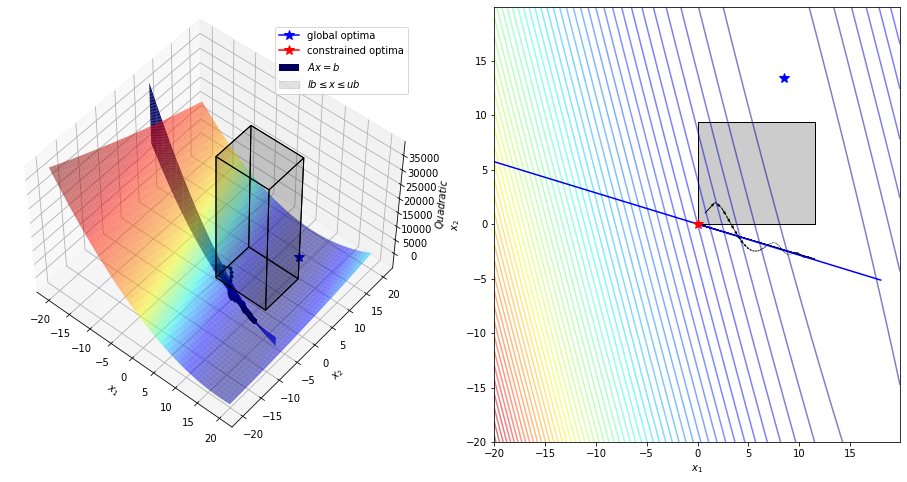

In [20]:
dual = LagrangianQuadratic(primal=quad, A=[2, 7], b=np.zeros(1), lb=np.zeros_like(q), ub=ub)
opt = AdaGrad(f=dual, step_size=1, epochs=100000, verbose=500).minimize()
print(opt.x)
print(opt.f.dual_x)  # Lagrange multipliers >= 0
plot_surface_trajectory_optimization(dual, opt, x_min=-20, x_max=20, y_min=-20, y_max=20)

## Box-Constrained Quadratic Methods

From the $\mathcal{L}_1$-SVM *Wolfe dual* formulation we observe that the equality constraints $Ax = 0$ are used to control the bias term $b$ since they are intoduced following the Lagrangian derivative wrt $b$ (see the *Computational Mathematics Report*). The simplest approach to learn the bias term $b$ is that of adding it at the end of the weights vector. So, we will need to solve a box-constrained quadratic problem:

$$
\begin{equation}
    \begin{aligned}
        \min_x \quad & \frac{1}{2}x^T Q x + q^T x \\
            \textrm{subject to} \quad & 0 \leq x \leq ub
    \end{aligned}
\end{equation}
$$

### Projected Gradient

iter	 cost		 gnorm
   0	-3.7375e+03	 3.2409e+02
   1	-4.5403e+03	 2.5232e+00
   2	-4.5470e+03	 1.3112e+00
   3	-4.5470e+03	 0.0000e+00

[9.63379013 9.32791922]


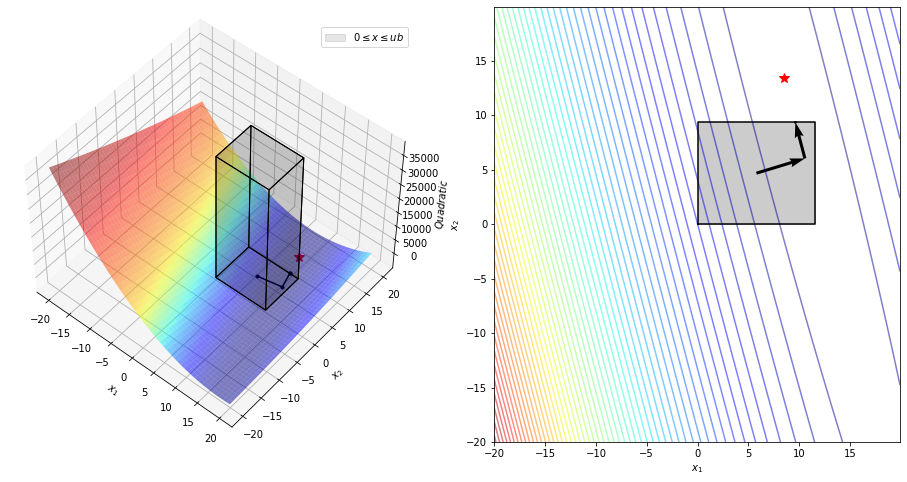

In [4]:
opt = ProjectedGradient(quad=quad, ub=ub, verbose=True).minimize()
print(opt.x)
plot_surface_trajectory_optimization(quad, opt, x_min=-20, x_max=20, y_min=-20, y_max=20)

### Frank-Wolfe or Conditional Gradient

iter	 cost		 lb		 gap
   0	-3.7375e+03	-5.9539e+03	 5.9301e-01
  50	-4.5455e+03	-4.5475e+03	 4.3824e-04
 100	-4.5459e+03	-4.5474e+03	 3.3513e-04
 150	-4.5461e+03	-4.5473e+03	 2.7253e-04
 200	-4.5462e+03	-4.5473e+03	 2.3026e-04
 250	-4.5463e+03	-4.5472e+03	 1.9970e-04
 300	-4.5464e+03	-4.5472e+03	 1.7651e-04
 350	-4.5465e+03	-4.5472e+03	 1.5828e-04
 400	-4.5465e+03	-4.5472e+03	 1.4357e-04
 450	-4.5466e+03	-4.5472e+03	 1.3142e-04
 500	-4.5466e+03	-4.5471e+03	 1.2121e-04
 550	-4.5466e+03	-4.5471e+03	 1.1251e-04
 600	-4.5467e+03	-4.5471e+03	 1.0501e-04
 650	-4.5467e+03	-4.5471e+03	 9.8462e-05
 700	-4.5467e+03	-4.5471e+03	 9.2700e-05
 750	-4.5467e+03	-4.5471e+03	 8.7589e-05
 800	-4.5467e+03	-4.5471e+03	 8.3022e-05
 850	-4.5467e+03	-4.5471e+03	 7.8917e-05
 900	-4.5468e+03	-4.5471e+03	 7.5206e-05
 950	-4.5468e+03	-4.5471e+03	 7.1834e-05
1000	-4.5468e+03	-4.5471e+03	 6.8757e-05

[9.68064562 9.15510037]


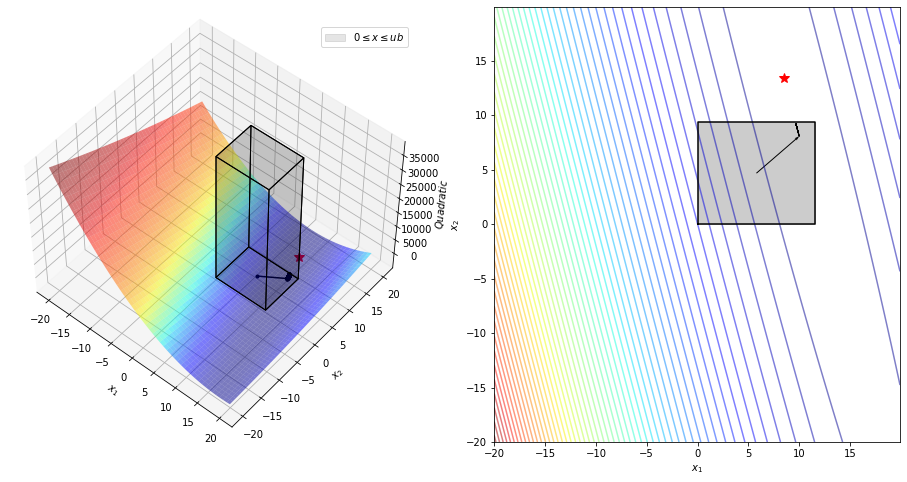

In [6]:
opt = FrankWolfe(quad=quad, ub=ub, verbose=50).minimize()
print(opt.x)
plot_surface_trajectory_optimization(quad, opt, x_min=-20, x_max=20, y_min=-20, y_max=20)

### Active Set

iter	 cost		|B|
   0	-3.7375e+03	0		I/O: I 0+1
   1	-4.3728e+03	1	

[7.24045607 9.32791922]


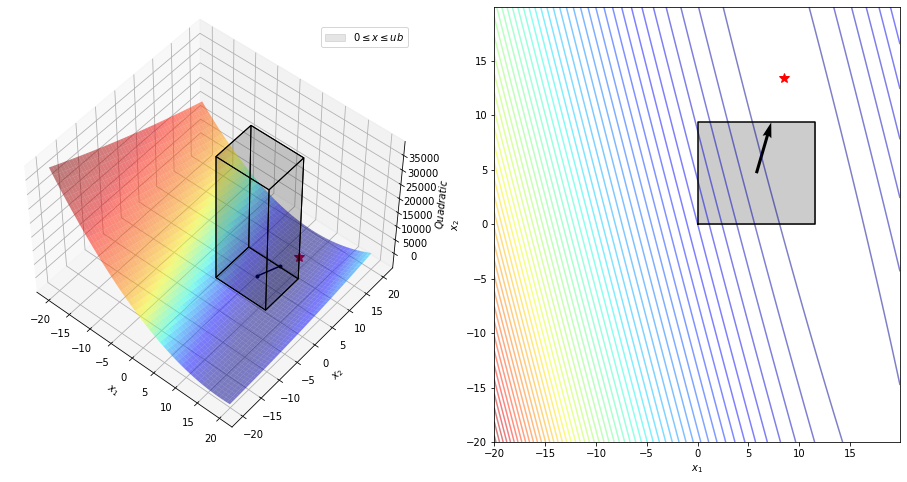

In [7]:
opt = ActiveSet(quad=quad, ub=ub, verbose=True).minimize()
print(opt.x)
plot_surface_trajectory_optimization(quad, opt, x_min=-20, x_max=20, y_min=-20, y_max=20)

### Interior Point

iter	 cost		 p		 gap
   0	-3.7375e+03	-5.9539e+03	 5.9301e-01
   1	-4.5276e+03	-5.5727e+03	 2.3083e-01
   2	-4.4835e+03	-4.7936e+03	 6.9169e-02
   3	-4.5443e+03	-4.6083e+03	 1.4082e-02
   4	-4.5446e+03	-4.5553e+03	 2.3515e-03
   5	-4.5460e+03	-4.5486e+03	 5.7137e-04
   6	-4.5469e+03	-4.5473e+03	 9.3526e-05
   7	-4.5470e+03	-4.5471e+03	 1.4445e-05
   8	-4.5470e+03	-4.5470e+03	 1.9422e-06
   9	-4.5470e+03	-4.5470e+03	 2.9440e-07
  10	-4.5470e+03	-4.5470e+03	 3.9455e-08
  11	-4.5470e+03	-4.5470e+03	 5.9786e-09
  12	-4.5470e+03	-4.5470e+03	 8.0118e-10
  13	-4.5470e+03	-4.5470e+03	 1.2140e-10
  14	-4.5470e+03	-4.5470e+03	 1.6269e-11

[9.63379014 9.32791921]


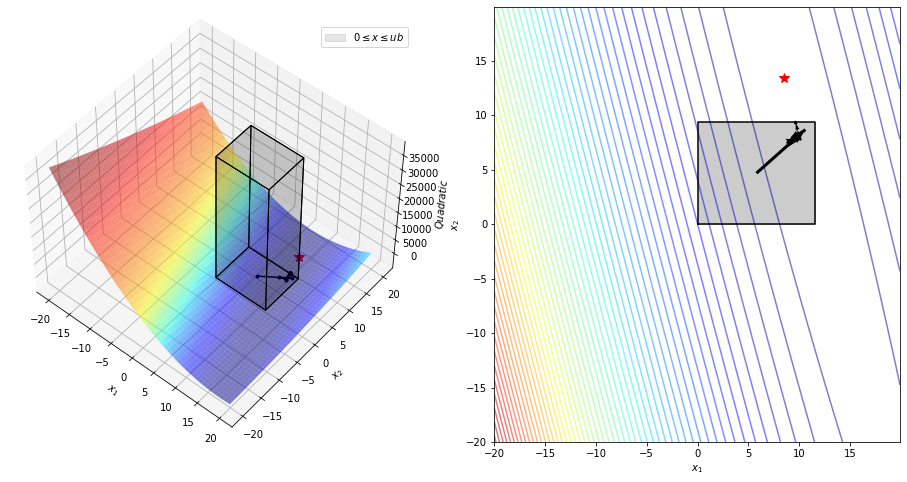

In [8]:
opt = InteriorPoint(quad=quad, ub=ub, verbose=True).minimize()
print(opt.x)
plot_surface_trajectory_optimization(quad, opt, x_min=-20, x_max=20, y_min=-20, y_max=20)

### Lagrangian Dual

In [27]:
from optiml.opti.unconstrained.stochastic import AdaGrad

epoch	iter	 cost		 gap		 rate
   0	   0	-4.9249e+02	 8.9169e-01			pcost: -4.9249e+02	dgap:  0.0000e+00
 200	 200	-4.5466e+03	 9.4218e-05	 1.0566e-04	pcost: -4.5466e+03	dgap:  0.0000e+00
 400	 400	-4.5470e+03	 3.4744e-06	 1.5798e-02	pcost: -4.5471e+03	dgap:  1.0904e-05
 600	 600	-4.5470e+03	-1.6885e-06	-7.6775e-03	pcost: -4.5470e+03	dgap:  7.3921e-06
 800	 800	-4.5470e+03	-3.1390e-07	-1.4273e-03	pcost: -4.5470e+03	dgap:  1.4063e-06
1000	1000	-4.5470e+03	-7.0313e-07	-3.1972e-03	pcost: -4.5470e+03	dgap:  1.6991e-06
1200	1200	-4.5470e+03	-6.0344e-07	-2.7438e-03	pcost: -4.5470e+03	dgap:  4.3728e-07
1400	1400	-4.5470e+03	-6.3026e-07	-2.8658e-03	pcost: -4.5470e+03	dgap:  5.1472e-07
1600	1600	-4.5470e+03	-6.2327e-07	-2.8340e-03	pcost: -4.5470e+03	dgap:  1.0134e-07
1800	1800	-4.5470e+03	-6.2521e-07	-2.8428e-03	pcost: -4.5470e+03	dgap:  1.4610e-07
2000	2000	-4.5470e+03	-6.2473e-07	-2.8407e-03	pcost: -4.5470e+03	dgap:  2.3886e-08
2200	2200	-4.5470e+03	-6.2486e-07	-2.8412e-03	pcost: -4.5470e+03	dg

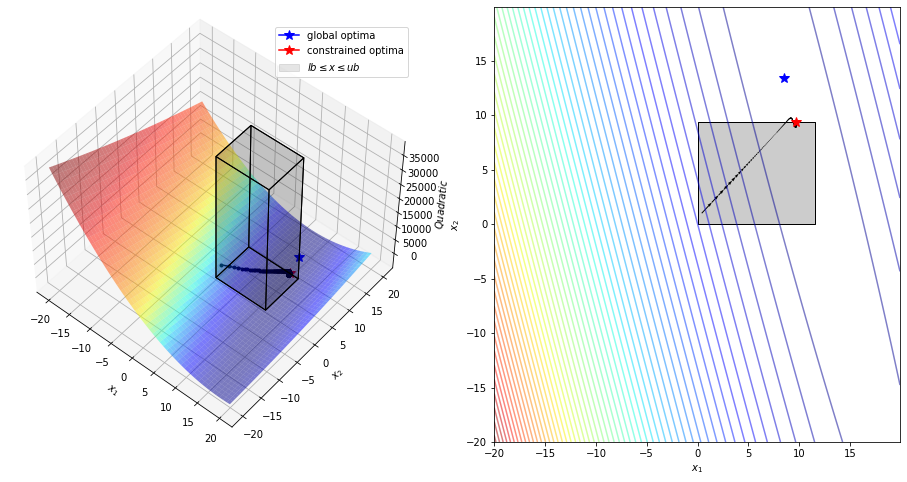

In [32]:
dual = LagrangianQuadratic(primal=quad, lb=np.zeros_like(q), ub=ub)
opt = AdaGrad(f=dual, step_size=1, epochs=10000, verbose=200).minimize()
print(opt.x)
print(opt.f.dual_x)  # Lagrange multipliers >= 0
plot_surface_trajectory_optimization(dual, opt, x_min=-20, x_max=20, y_min=-20, y_max=20)